In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
atp_tennis_data = pd.read_csv('tennis_stats.csv')
atp_tennis_dataframe = pd.DataFrame(atp_tennis_data)
atp_tennis_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

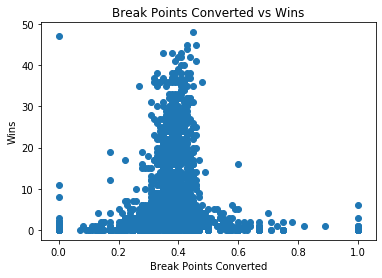

In [105]:
plt.scatter(atp_tennis_dataframe['BreakPointsConverted'],atp_tennis_dataframe['Wins'])
plt.xlabel('Break Points Converted')
plt.ylabel('Wins')
plt.title('Break Points Converted vs Wins')
plt.show()

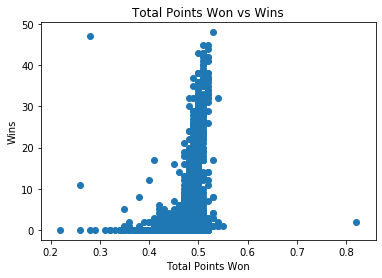

In [29]:
plt.scatter(atp_tennis_dataframe['TotalPointsWon'],atp_tennis_dataframe['Wins'])
plt.xlabel('Total Points Won')
plt.ylabel('Wins')
plt.title('Total Points Won vs Wins')
plt.show()

# Single Feature Linear Regression

From the use of linear regression with a single feature, the findings that were found were varying on all levels. This is evident from the graphs below showing that factors like ranking and other aspects involved in a tennis match like service games that were won by players and the total points won by players had very little to no affect to the outcome of the win records of players. On the other hand, though, break point opportunities are seen as a very important factor that can affect if a player can win a game as seen from the graph showing a high linear correlation, therefore significantly affecting if a player can win a game or not with more break point opportunities giving a higher chance of a player winning a game. 

Predicted wins from tennis player rankings: 9.0


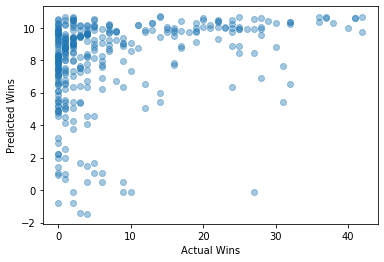

In [92]:
one_feature_model_x = atp_tennis_dataframe[['Ranking']]
one_feature_model_y = atp_tennis_dataframe[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(one_feature_model_x, one_feature_model_y, train_size = 0.8, test_size = 0.2)

one_feature_model = LinearRegression()
one_feature_model.fit(x_train, y_train)

print('Predicted wins from tennis player rankings: ' + str(round(one_feature_model.score(x_test, y_test),2) * 100))

model_prediction = one_feature_model.predict(x_test)

plt.scatter(y_test, model_prediction, alpha = 0.4)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()

Predicted wins percentage through service games that are won are : 11.0


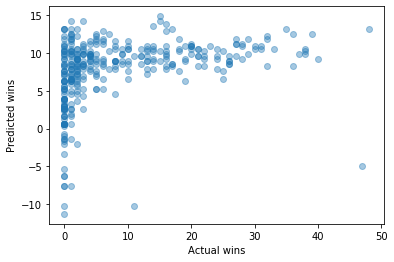

In [98]:
second_one_model_x  = atp_tennis_dataframe[['ServiceGamesWon']]
second_one_model_y = atp_tennis_dataframe[['Wins']]

second_model_feature_train, second_model_feature_test, second_model_predictioncategory_train, second_model_predictioncategory_test = train_test_split(second_one_model_x, second_one_model_y, train_size = 0.8, test_size = 0.2)

second_one_feature_model = LinearRegression()
second_one_feature_model.fit(second_model_feature_train,second_model_predictioncategory_train)

print('Predicted wins percentage through service games that are won are : ' + str(round(second_one_feature_model.score(second_model_feature_test, second_model_predictioncategory_test),2) * 100))

model_prediction_2 = second_one_feature_model.predict(second_model_feature_test)

plt.scatter(second_model_predictioncategory_test, model_prediction_2, alpha = 0.4)
plt.plot()
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.show()


Predicted wins percentage from break point opportunities : 79.0


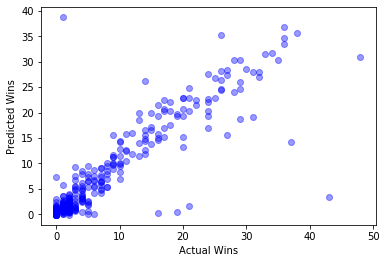

In [104]:
feature_model_x = atp_tennis_dataframe[['BreakPointsOpportunities']]
feature_model_y = atp_tennis_dataframe[['Wins']]

third_model_feature_train, third_model_feature_test, third_model_winnings_train, third_model_winnings_test = train_test_split(feature_model_x, feature_model_y, train_size = 0.8, test_size = 0.2)

third_model = LinearRegression()
third_model.fit(third_model_feature_train, third_model_winnings_train)

print('Predicted wins percentage from break point opportunities : ' + str(round(third_model.score(third_model_feature_test, third_model_winnings_test),2) * 100))

third_model_prediction = third_model.predict(third_model_feature_test)

plt.scatter(third_model_winnings_test, third_model_prediction, color = 'blue', alpha = 0.4)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()

Predicted percentage of wins by considering total points won: 18.0


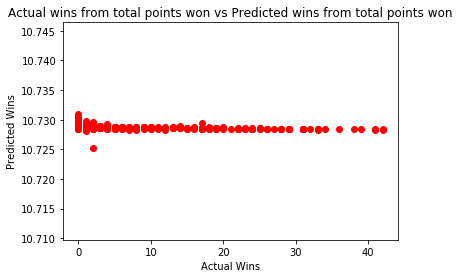

In [101]:
one_feature_model_4_x = atp_tennis_dataframe[['TotalPointsWon']]
one_feature_model_4_y = atp_tennis_dataframe[['Wins']]

one_feature_model_4_x_train, one_feature_model_4_x_test, one_feature_model_4_y_train, one_feature_model_4_y_test = \
train_test_split(one_feature_model_4_x, one_feature_model_4_y, train_size = 0.8, test_size = 0.2)

one_feature_model_4 = LinearRegression()
one_feature_model_4.fit(one_feature_model_4_x_train, one_feature_model_4_y_train)

print('Predicted percentage of wins by considering total points won: ' + str(round(one_feature_model_4.score(one_feature_model_4_x_test, one_feature_model_4_y_test),2)* 100))

one_feature_model_4_prediction = one_feature_model.predict(one_feature_model_4_x_test)

plt.scatter(one_feature_model_4_y_test, one_feature_model_4_prediction, color = 'red')
plt.title('Actual wins from total points won vs Predicted wins from total points won')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()


# Multi Feature Linear Regression 

The use of multi feature linear regression also presented many surprising graphs and led to many findings that had an affect on the outcome of tennis players winning games. Majority of the findings indicated a group of similar facets of the game such as return games played, return games won and return points won were collectively important in determing the outcome of a player winning a game with a predicted win percentage ranging to 87-92 percent on each iteration. This was also prevalent with other collective scenarios such as service games played, service games won and total service points as well as break point opportunities, break points saved, break points faced and break points converted with each of their prediction models determining the predicted winning percentage for players between 88-91 and 81-86 percent with each iteration.

Other findings, however, that indicated a very little amount of significance in changing the outcome of the wins column of players were the scenarios of first serve and second serve scenarios where collective linear regression models of first serve, first serve points won and first serve return points won and second serve points win and second serve return points won resulted in predicted winning percentages for players ranging from 13-20 percent and 0-9 percent. 

Predicted wins percentage through all break point scenarios in consideration: 86.09


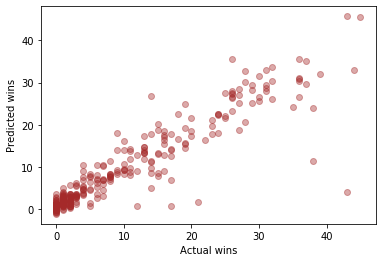

In [109]:
multi_feature_model_x =  atp_tennis_dataframe[['BreakPointsOpportunities','BreakPointsSaved','BreakPointsFaced', 'BreakPointsConverted']]
multi_feature_model_y = atp_tennis_dataframe[['Wins']]

multi_feature_x_train, multi_feature_x_test, multi_feature_y_train, multi_feature_y_test = train_test_split(multi_feature_model_x, multi_feature_model_y, train_size = 0.8, test_size = 0.2)
                                             
multi_feature_model = LinearRegression()
multi_feature_model.fit(multi_feature_x_train, multi_feature_y_train)

print('Predicted wins percentage through all break point scenarios in consideration: ' + str(round(multi_feature_model.score(multi_feature_x_test, multi_feature_y_test) * 100,2)))

multi_feature_prediction = multi_feature_model.predict(multi_feature_x_test)

plt.scatter(multi_feature_y_test, multi_feature_prediction, alpha = 0.4, color = 'brown')
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.show()



The percentage of wins with consideration to all first serve considerations: 17.0


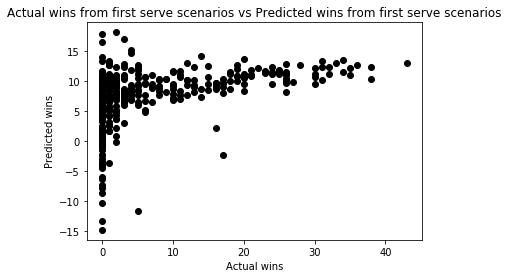

In [117]:
multi_feature_model_2_x  = atp_tennis_dataframe[['FirstServe','FirstServePointsWon', 'FirstServeReturnPointsWon']]
multi_feature_model_2_y = atp_tennis_dataframe[['Wins']]

multi_feature_model_2_x_train, multi_feature_model_2_x_test, multi_feature_model_2_y_train, multi_feature_model_2_y_test = train_test_split(multi_feature_model_2_x, multi_feature_model_2_y, train_size = 0.8, test_size = 0.2)

multi_feature_model_2 = LinearRegression()
multi_feature_model_2.fit(multi_feature_model_2_x_train, multi_feature_model_2_y_train)

print('The percentage of wins with consideration to all first serve considerations: ' + str(round(multi_feature_model_2.score(multi_feature_model_2_x_test, multi_feature_model_2_y_test),2) * 100))

multi_feature_model_2_prediction = multi_feature_model_2.predict(multi_feature_model_2_x_test)

plt.scatter(multi_feature_model_2_y_test, multi_feature_model_2_prediction, c = 'black')
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.title('Actual wins from first serve scenarios vs Predicted wins from first serve scenarios')
plt.show()




The percentage of wins with consideration to all second serve scenarios: 0.0


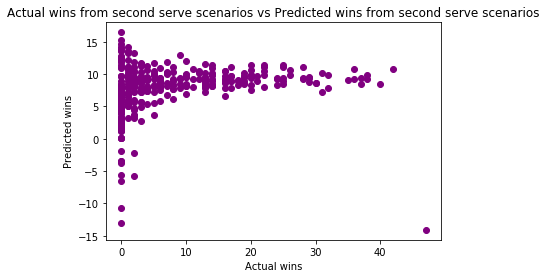

In [114]:
multi_feature_model_3_x = atp_tennis_dataframe[['SecondServePointsWon', 'SecondServeReturnPointsWon']]
multi_feature_model_3_y  = atp_tennis_dataframe[['Wins']]

multi_feature_model_3_x_train, multi_feature_model_3_x_test, multi_feature_model_3_y_train, multi_feature_model_3_y_test = train_test_split(multi_feature_model_3_x, multi_feature_model_3_y, train_size = 0.8, test_size = 0.2)

multi_feature_model_3 = LinearRegression()
multi_feature_model_3.fit(multi_feature_model_3_x_train, multi_feature_model_3_y_train)

print('The percentage of wins with consideration to all second serve scenarios: ' + str(round(multi_feature_model_3.score(multi_feature_model_3_x_test, multi_feature_model_3_y_test),2)* 100))

multi_feature_model_prediction = multi_feature_model_3.predict(multi_feature_model_3_x_test)

plt.scatter(multi_feature_model_3_y_test, multi_feature_model_prediction, color = 'purple')
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.title('Actual wins from second serve scenarios vs Predicted wins from second serve scenarios')
plt.show()


The percentage of wins with consideration to all return games and points scenarios are: 92.0


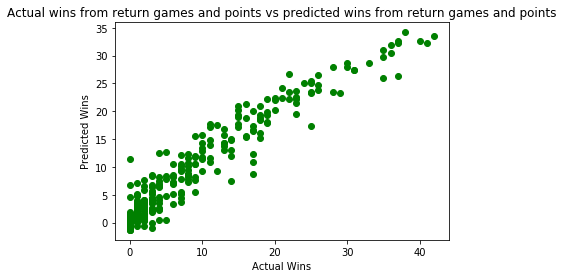

In [80]:
multi_feature_model_4_x = atp_tennis_dataframe[['ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon']]
multi_feature_model_4_y = atp_tennis_dataframe[['Wins']]

multi_feature_model_4_x_train, multi_feature_model_4_x_test, multi_feature_model_4_y_train, multi_feature_model_4_y_test = \
train_test_split(multi_feature_model_4_x, multi_feature_model_4_y, train_size = 0.8, test_size = 0.2)

multi_feature_model_4 = LinearRegression()
multi_feature_model_4.fit(multi_feature_model_4_x_train, multi_feature_model_4_y_train)

print('The percentage of wins with consideration to all return games and points scenarios are: ' + str(round(multi_feature_model_4.score(multi_feature_model_4_x_test, multi_feature_model_4_y_test),2)* 100))

multi_feature_model_4_prediction = multi_feature_model_4.predict(multi_feature_model_4_x_test)

plt.scatter(multi_feature_model_4_y_test,multi_feature_model_4_prediction, color = 'green')
plt.title('Actual wins from return games and points vs predicted wins from return games and points')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()


The percentage of wins with consideration to all service games considered: 91.0


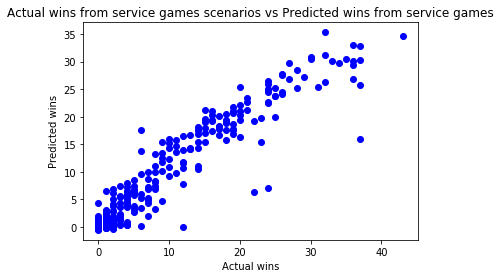

In [110]:
multi_feature_model_5_x = atp_tennis_dataframe[['ServiceGamesPlayed','ServiceGamesWon','TotalServicePointsWon']]
multi_feature_model_5_y = atp_tennis_dataframe[['Wins']]

multi_feature_model_5_x_train, multi_feature_model_5_x_test, multi_feature_model_5_y_train, multi_feature_model_5_y_test = \
train_test_split(multi_feature_model_5_x, multi_feature_model_5_y, train_size = 0.8, test_size = 0.2)

multi_feature_model_5 = LinearRegression()
multi_feature_model_5.fit(multi_feature_model_5_x_train, multi_feature_model_5_y_train)

print('The percentage of wins with consideration to all service games considered: ' + str(round(multi_feature_model_5.score(multi_feature_model_5_x_test, multi_feature_model_5_y_test),2)* 100))

multi_feature_model_5_prediction = multi_feature_model_5.predict(multi_feature_model_5_x_test)

plt.scatter(multi_feature_model_5_y_test, multi_feature_model_5_prediction, color = 'blue')
plt.title('Actual wins from service games scenarios vs Predicted wins from service games')
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.show()




# Conclusion

In conlusion, it is pretty evident that tennis players have the best chance of winning games by being successful in return game situations. However, other areas of the game they play are also strong factors in ensuring that they win a tennis match. Individual factors that are the most important for tennis players to focus on converting break point oppor